# SEGMENT ANALYSIS

In [1]:
%cd ..
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
warnings.filterwarnings('ignore')

d:\ML Projects\Customer_segmentation_analysis


In [2]:
data_path = 'Data\\marketing_campaign.csv'
data = pd.read_csv(data_path, delimiter='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format = "%d-%m-%Y")
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

days = []
max_date = max(dates)
for i in dates:
    difference = max_date - i
    days.append(difference)

In [7]:
data['Customer For'] = days
data['Customer For'] = pd.to_numeric(data['Customer For'], errors= 'coerce')

In [8]:
data['Age'] = 2025 - data['Year_Birth']
data['Total Spend'] = data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + data['MntMeatProducts'] + data['MntSweetProducts'] + data['MntWines']
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Living With'] = data['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
data['Total Members'] = data['Living With'].replace({'Alone': 1, 'Partner': 2}) + data['Children']

In [9]:
data['Parent'] = data['Children'].apply(lambda x: 1 if x > 0 else 0 )
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [10]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [11]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(columns=to_drop)

In [12]:
scatter_columns = ['Age', 'Income', 'Total Spend']

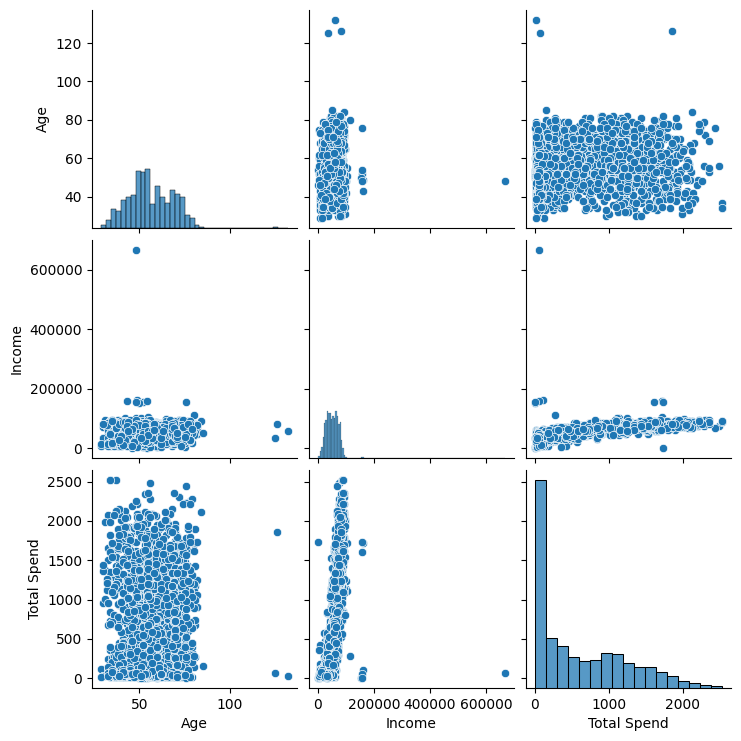

In [13]:
import seaborn as sns
sns.pairplot(data[scatter_columns])

In [14]:
data = data[data['Age'] < 90]
data = data[data['Income'] < 250000]

In [15]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer For,Age,Total Spend,Children,Living With,Total Members,Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,68,1617,0,Alone,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,71,27,2,Alone,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,60,776,0,Partner,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,41,53,1,Partner,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,44,422,1,Partner,3,1


In [16]:
cat_cols = data.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()
for col in cat_cols:
    data[col] = Lencoder.fit_transform(data[col])

In [17]:
df = data.copy()
cols_to_drop =  ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(columns = cols_to_drop)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns= df.columns )
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer For,Age,Total Spend,Children,Living With,Total Members,Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.264598,-1.349603,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,1.404572,-1.349603,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,-1.264598,0.740959,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.069987,0.740959,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.069987,0.740959,0.449070,0.632456


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_df))
PCA_df.columns = ['A','B']

In [21]:
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2212.0,5.139550e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
B,2212.0,3.854662e-17,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189


In [22]:
from sklearn.cluster import KMeans
inertia = []
for k in range(2,13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_df)
    inertia.append(kmeans.inertia_)

  File "d:\ML Projects\Customer_segmentation_analysis\sales\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Python 3.12\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Python 3.12\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Python 3.12\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Text(0.5, 1.0, 'elbow method for optimal number of clusters')

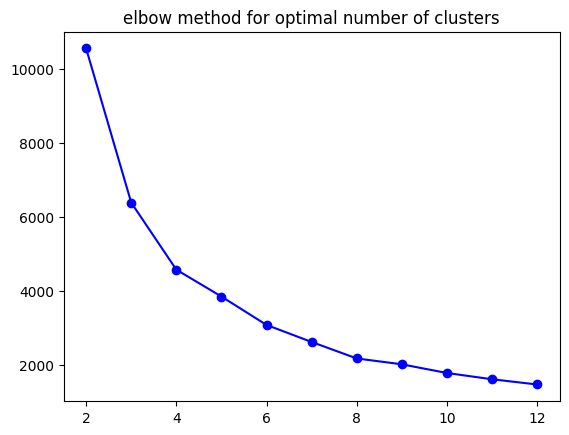

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(2,13), inertia, marker = 'o', linestyle = '-', color = 'blue')
plt.title("elbow method for optimal number of clusters")


In [24]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
y_pred = ac.fit_predict(PCA_df)
PCA_df['Cluster'] = y_pred


In [25]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(PCA_df, y_pred)
print(sil_score)

0.5543905218362022


In [47]:
pal = ['#26547C', '#EF476F', '#FFD166', '#06D6A0']

<Axes: xlabel='Cluster', ylabel='count'>

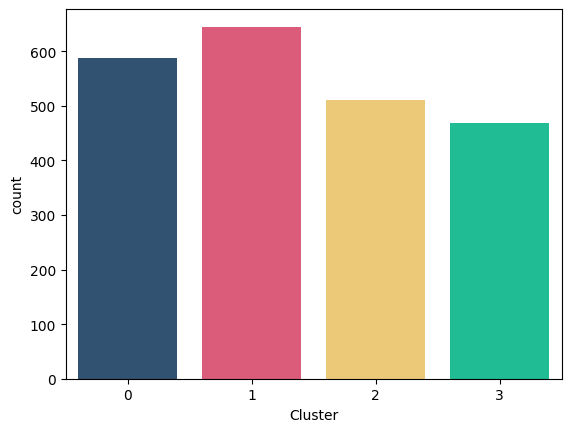

In [48]:
sns.countplot(PCA_df, x = 'Cluster', palette=pal)

In [37]:
data['Clusters'] = y_pred

<Axes: xlabel='Total Spend', ylabel='Income'>

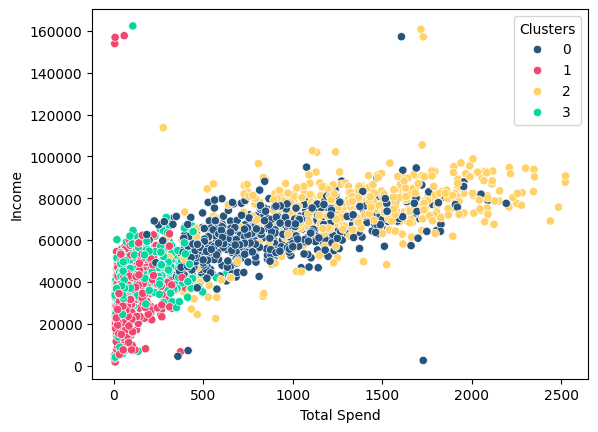

In [49]:
sns.scatterplot(data, x = 'Total Spend', y = 'Income', hue='Clusters', palette=pal)

<Axes: xlabel='Clusters', ylabel='Income'>

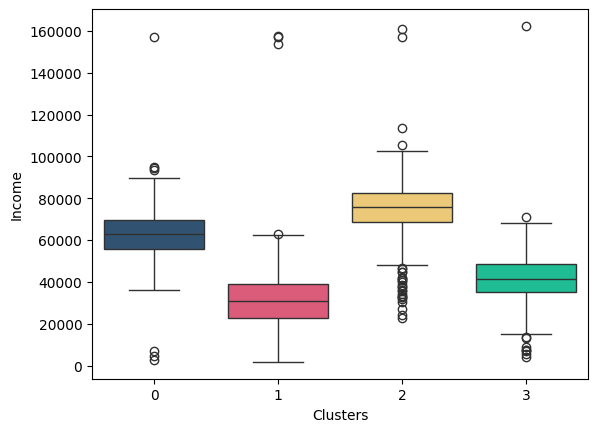

In [50]:
sns.boxplot(data=data, x = 'Clusters' , y = 'Income', palette=pal)

<Axes: xlabel='Clusters', ylabel='Total Spend'>

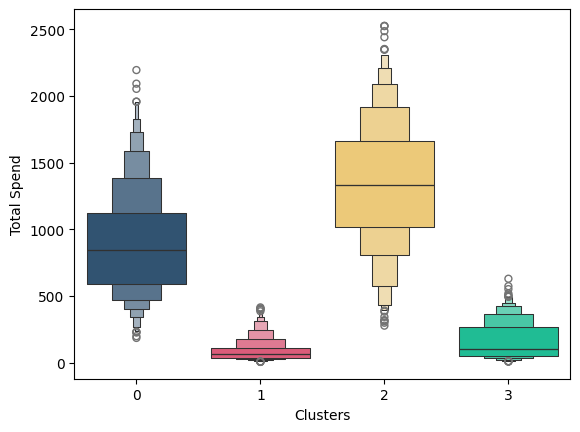

In [51]:
sns.boxenplot(data=data, x = 'Clusters' , y = 'Total Spend', palette=pal)

<Axes: xlabel='Total Promotions', ylabel='count'>

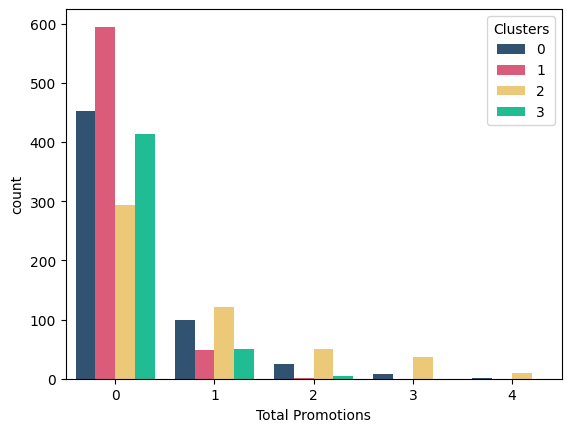

In [52]:
data['Total Promotions'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
sns.countplot(x = data['Total Promotions'], hue = data['Clusters'], palette=pal)


<Axes: xlabel='Clusters', ylabel='NumDealsPurchases'>

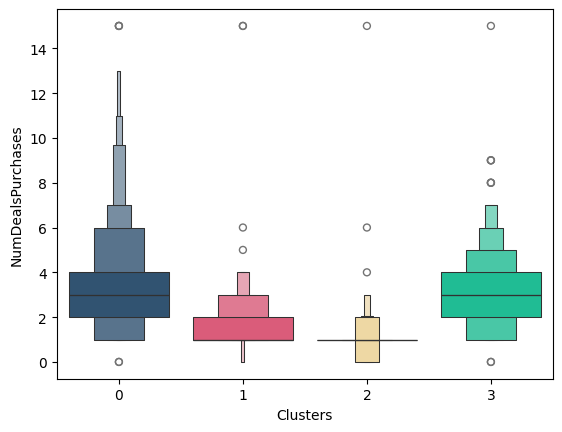

In [53]:
sns.boxenplot(x=data['Clusters'], y = data['NumDealsPurchases'], palette=pal)